In [1]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

C:\ProgramData\Miniconda3\lib\site-packages\fastcore\foundation.py:51: UserWarning: `patch_property` is deprecated and will be removed; use `patch(as_prop=True)` instead
  warnings.warn("`patch_property` is deprecated and will be removed; use `patch(as_prop=True)` instead")


### Key for Bing Image Search API

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', 'xxx')

### Downloading images

In [3]:
car_makes = 'bmw', 'audi', 'mercedes-benz'
path = Path('cars')

In [4]:
if not path.exists():
    path.mkdir()
    for make in car_makes:
        dest = (path/make)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, make)
        download_images(dest, urls=results.attrgot('content_url'))

### Removing failed images

In [5]:
fns = get_image_files(path)
fns

(#445) [Path('cars/audi/00000000.jpg'),Path('cars/audi/00000001.jpg'),Path('cars/audi/00000002.jpg'),Path('cars/audi/00000003.jpg'),Path('cars/audi/00000004.jpg'),Path('cars/audi/00000005.jpg'),Path('cars/audi/00000006.jpg'),Path('cars/audi/00000007.jpg'),Path('cars/audi/00000008.jpg'),Path('cars/audi/00000009.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#28) [Path('cars/audi/00000055.jpg'),Path('cars/audi/00000070.jpg'),Path('cars/audi/00000102.jpg'),Path('cars/bmw/00000054.jpg'),Path('cars/bmw/00000085.jpg'),Path('cars/bmw/00000100.jpeg'),Path('cars/mercedes-benz/00000021.jpg'),Path('cars/mercedes-benz/00000037.jpg'),Path('cars/mercedes-benz/00000038.jpg'),Path('cars/mercedes-benz/00000042.jpeg')...]

In [7]:
failed.map(Path.unlink)

(#28) [None,None,None,None,None,None,None,None,None,None...]

### Creating DataLoaders

In [8]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=11),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [9]:
dls = cars.dataloaders(path, num_workers=0)

### Training model

In [10]:
learner = cnn_learner(dls, resnet34, metrics=error_rate)

In [11]:
learner.fine_tune(4, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.905086,3.987088,0.616000,00:22
1,1.749735,2.039382,0.600000,00:20
2,1.585148,1.043152,0.440000,00:21


C:\ProgramData\Miniconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.856284,0.956031,0.368000,00:21
1,0.895603,0.999968,0.368000,00:22
2,0.798840,0.954554,0.384000,00:21
3,0.736111,0.942130,0.368000,00:21


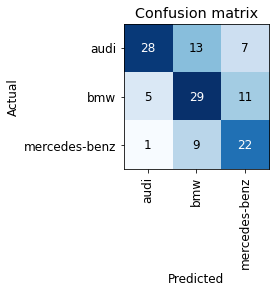

In [12]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

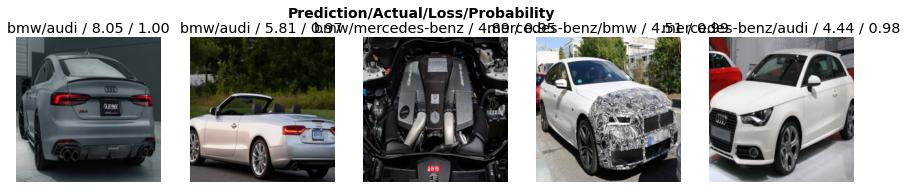

In [13]:
interp.plot_top_losses(5, nrows=1)